In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [13]:
medical_df = pd.read_csv('medical-charges.csv')

medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Based on what we used previously i can suggest those ways of estiamting charges:

 - We can make a heat map visualisation as we did previously and find some connections between fields. Than build visulaisations for that fields, and based on visulaisation we can see some connections between data, and based on that we can create some estimations. 
 - Also we can use some basic statistics, so we can use hipothesis testing, and use that to make some estimations.
 - Also we can just use the most privitive method, just manually set boundes for groups that we can see in data, and based on that boundaries we can classify new inputs, and we can probably estiamte some data. 

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

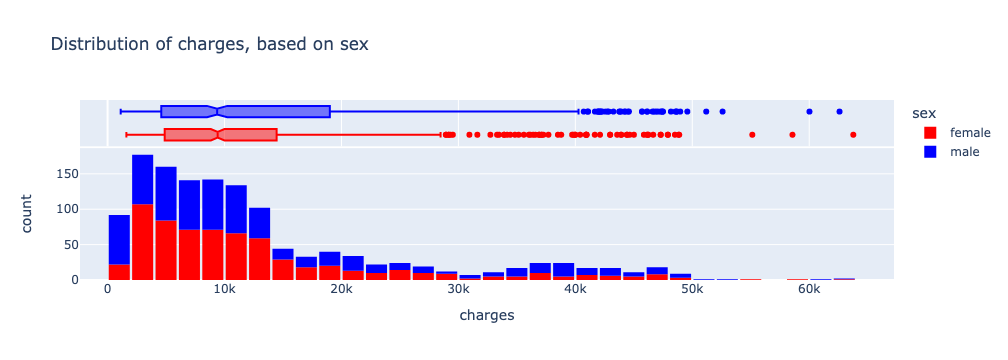

sex
male      50.52
female    49.48
Name: proportion, dtype: float64

In [71]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color="sex",
                   color_discrete_sequence=['red', "blue"],
                   title='Distribution of charges, based on sex')
fig.update_layout(bargap=0.1)
fig.show()

round(medical_df.sex.value_counts(normalize=True) * 100, 2)

In this cas we see that we have wider distibution in males, and more outliers in females. Over all we cann see more values comulated in 0-10k range, both for males and females.

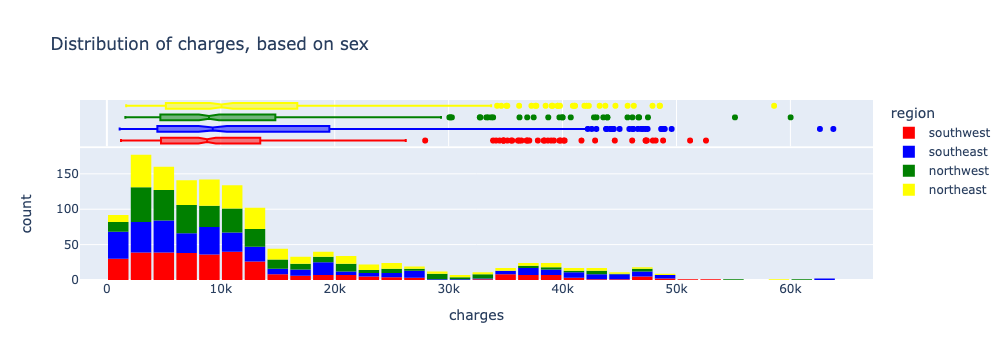

In [63]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color="region",
                   color_discrete_sequence=['red', "blue", "green", "yellow"],
                   title='Distribution of charges, based on sex')
fig.update_layout(bargap=0.1)
fig.show()

In this case it is hard to make some estimations about data, some regions have more data, some have less, but the median is the same. THe distribution is also a bit different  for each region, but hard to make any analytics

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

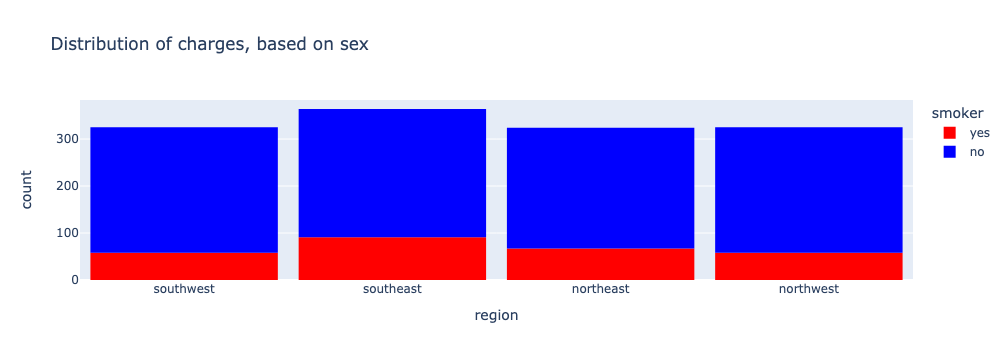

In [79]:
fig = px.histogram(medical_df,
                   x='region',
                   color="smoker",
                   color_discrete_sequence=['red', "blue", "green", "yellow"],
                   title='Distribution of charges, based on sex')
fig.update_layout(bargap=0.1)
fig.show()

It seems like the amount of smokers and non smokers are evenly distributed between all the regions. southeast has more data and hence has more smokers/nonsmokers, but the ratio seems the same.

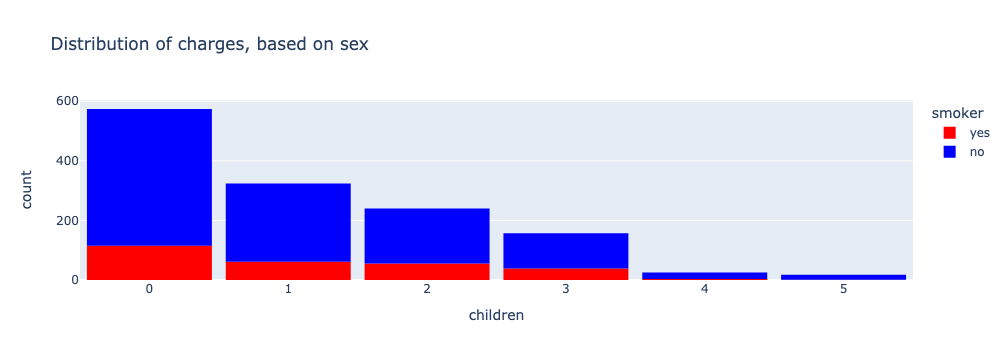

In [83]:
fig = px.histogram(medical_df,
                   x='children',
                   color="smoker",
                   color_discrete_sequence=['red', "blue", "green", "yellow"],
                   title='Distribution of charges, based on sex')
fig.update_layout(bargap=0.1)
fig.show()

Here we can see that the higher values the less data is there. Most of the smokers and non mokers are having zero children, and the ratio of smokers/non smokers seems to be more or less the same for all the values.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

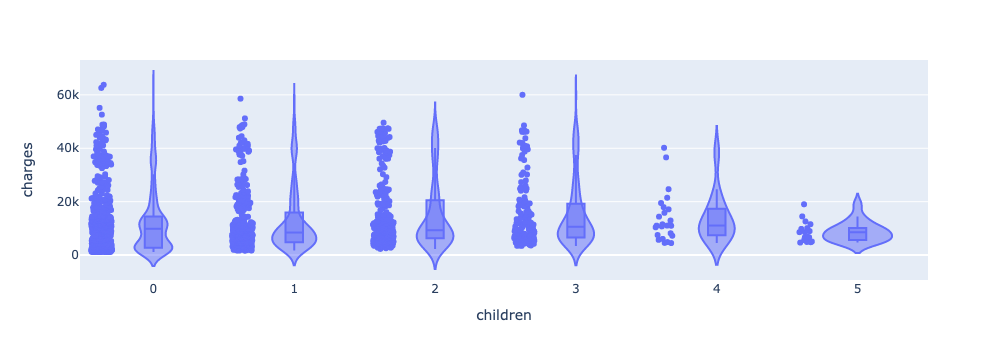

In [95]:
fig = px.violin(
    medical_df,
    x="children",
    y="charges",
    box=True,
     points='all'
)

fig.show()

Here we can clearly see that median rises with amount of children, and stops at 5, since there is not much data there.
And also we see more outliers for 0-4, and much less for 5

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [99]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [101]:
def estimate_charges(age, w, b):
    return w * age + b

In [103]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

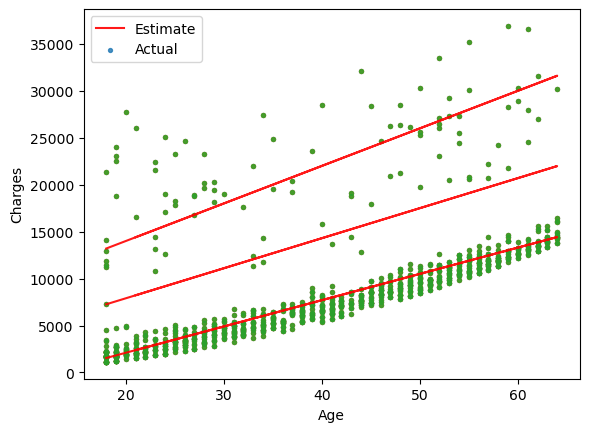

In [161]:
try_parameters(non_smoker_df, 280, -3500)
try_parameters(non_smoker_df, 400, 6000)
try_parameters(non_smoker_df, 320, 1500)

Here i tried to make 3 lines each one would describe something different, now i have those lines from up:
    
    1. Line that describes outliers
    2. Line that describes both main values and outliers
    3. Line that describes only normal values

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [178]:
def calculateLoss(df, w, b):
    prediction = df * w + b
    
    return round(np.sqrt(np.mean(np.square(df - prediction))), 2)
    

In [183]:
print(calculateLoss(non_smoker_df.charges, 280, -3500),
calculateLoss(non_smoker_df.charges, 400, 6000),
calculateLoss(non_smoker_df.charges, 320, 1500))


2883530.57 4132731.48 3301424.67


Here what we can see is that the biggest loss has weights that try to fit all the data. and the best fit has the one that tries to fit outliers.